In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df = df.drop(columns=["Name", "Ticket", "Cabin"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

"Age", "Embarked" have missing values

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


male      577
female    314
Name: Sex, dtype: int64

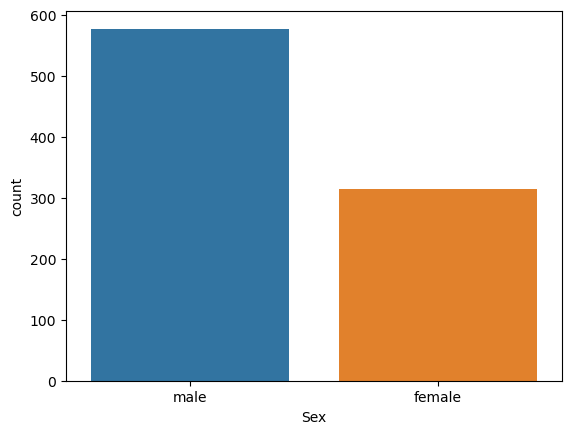

In [8]:
import seaborn as sns
sns.countplot(x = df["Sex"], data = df)
df["Sex"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

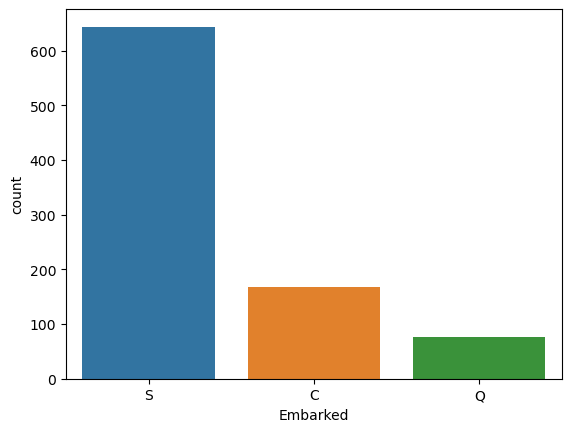

In [9]:
sns.countplot(x = df["Embarked"], data = df)
df["Embarked"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

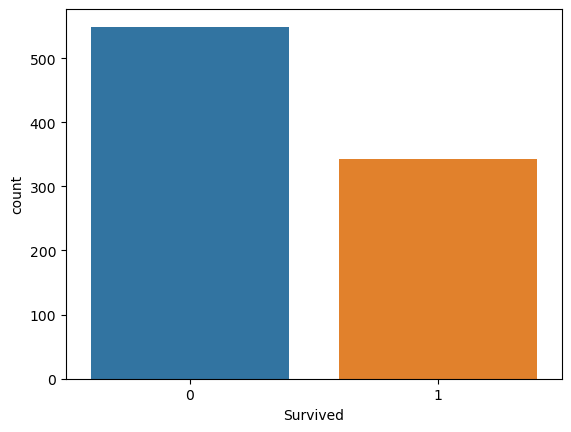

In [10]:
sns.countplot(x = df["Survived"], data = df)
df["Survived"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

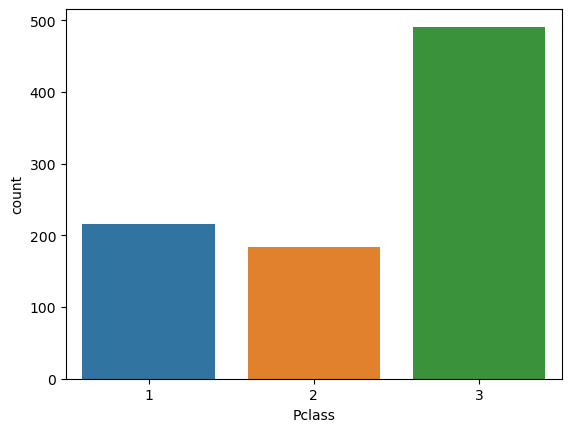

In [11]:
sns.countplot(x = df["Pclass"], data = df)
df["Pclass"].value_counts()

<Axes: xlabel='Age', ylabel='Count'>

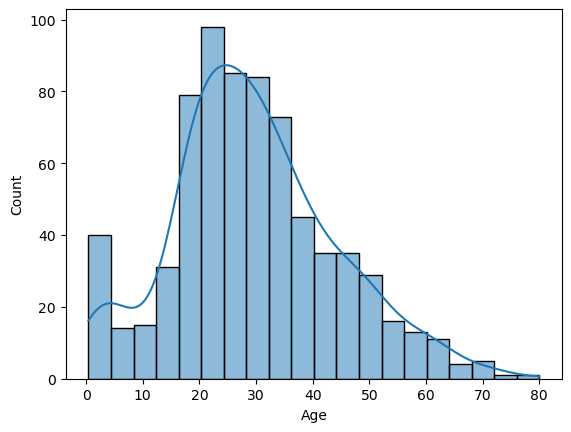

In [12]:
sns.histplot(df["Age"], kde=True)

<Axes: >

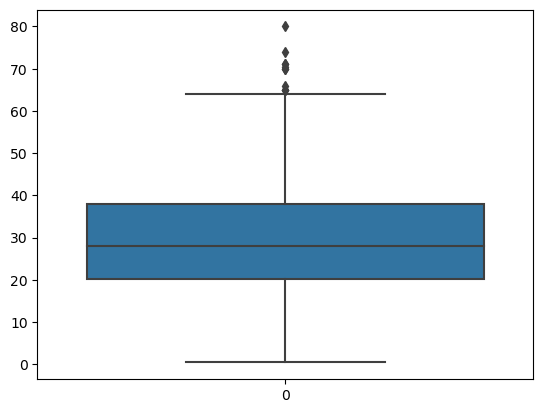

In [13]:
sns.boxplot(df["Age"])

In [14]:
df['Age'].skew()

0.38910778230082704

In [15]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75+1.5*IQR
lower_limit = percentile25-1.5*IQR

In [16]:
import numpy as np
df['Age'] = np.where(
    df['Age'] > upper_limit,
    upper_limit,
    np.where(
        df['Age'] < lower_limit,
        lower_limit,
        df['Age']
    )
)

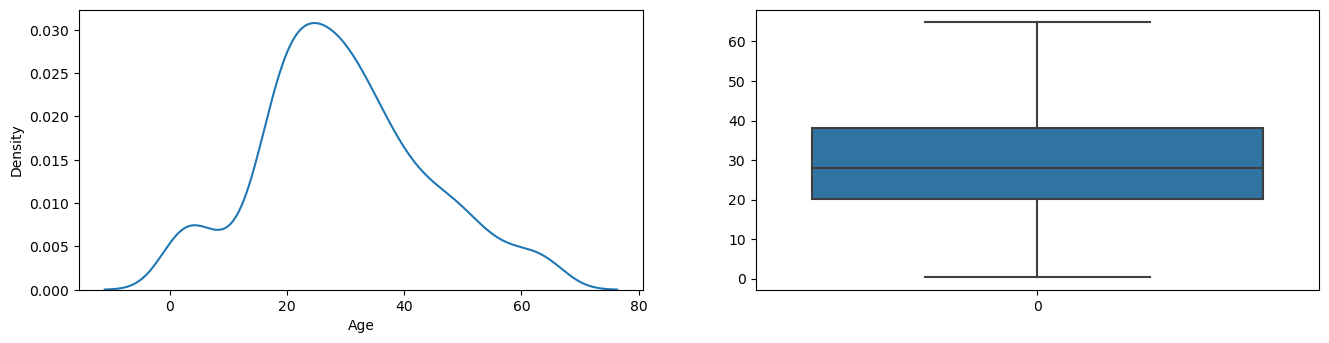

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.kdeplot(df['Age'])

plt.subplot(2,2,4)
sns.boxplot(df['Age'])

plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

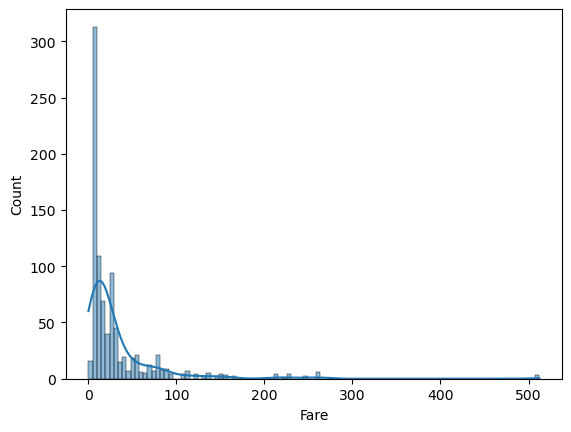

In [18]:
sns.histplot(df["Fare"], kde=True)

<Axes: >

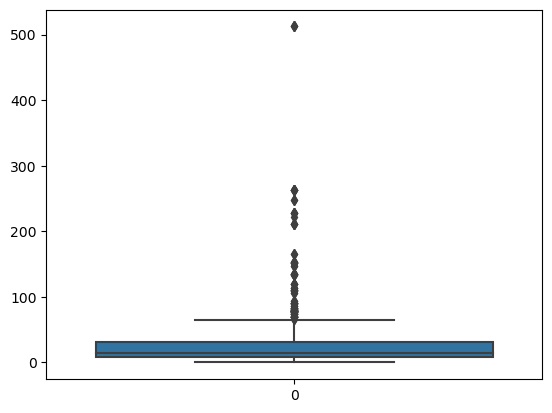

In [19]:
sns.boxplot(df["Fare"])

In [20]:
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75+1.5*IQR
lower_limit = percentile25-1.5*IQR

In [21]:
df['Fare'] = np.where(
    df['Fare'] > upper_limit,
    upper_limit,
    np.where(
        df['Fare'] < lower_limit,
        lower_limit,
        df['Fare']
    )
)

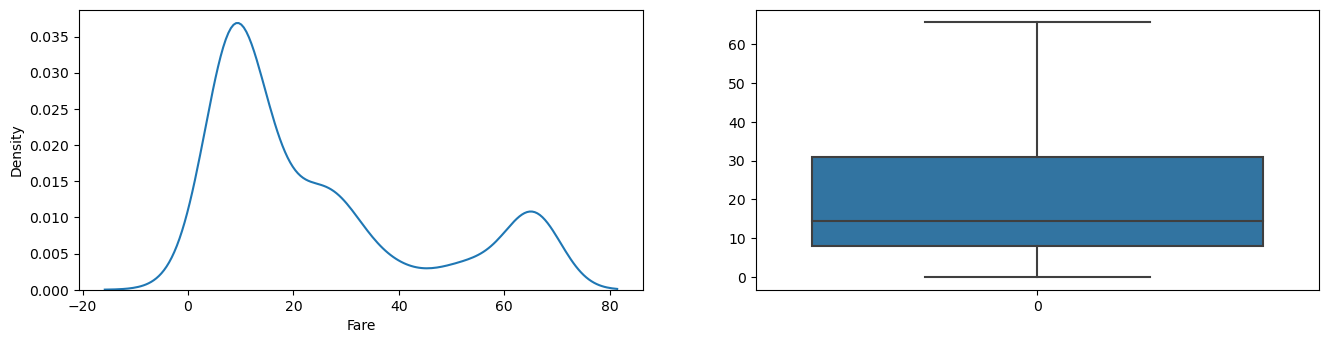

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.kdeplot(df['Fare'])

plt.subplot(2,2,4)
sns.boxplot(df['Fare'])

plt.show()

There are outliers in "Age" and "Fare"

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,65.6344,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
df.drop(columns=["PassengerId"], inplace = True)

<Axes: >

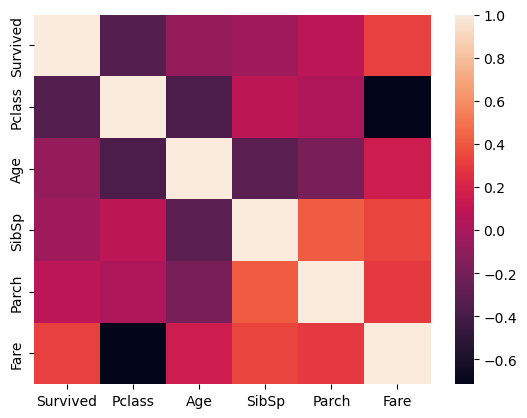

In [27]:
sns.heatmap(df.corr(numeric_only=True))

In [28]:
# Step 1 -> train/test/split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [29]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [32]:
# imputation transformer

from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
trf1 = ColumnTransformer(transformers = [
    ("impute_age", SimpleImputer(strategy = "mean", add_indicator = True),[2]),
    ("impute_embarked", SimpleImputer(strategy = "most_frequent", add_indicator = True),[6])
],remainder = "passthrough")

In [33]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
trf2 = ColumnTransformer(transformers = [
    ("ohe_sex_embarked", OneHotEncoder(sparse = False, handle_unknown="ignore"),[1,6])
],remainder = "passthrough")

In [34]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
trf3 = ColumnTransformer(transformers = [
    ("scale", MinMaxScaler(), slice(0,10))
])

In [35]:
from sklearn.decomposition import PCA
trf4_1 = PCA(n_components=4)

In [36]:
# Feature selection
from sklearn.feature_selection import SelectKBest, chi2
trf4 = SelectKBest(score_func=chi2,k=8)

In [37]:
# train the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# trf5 = DecisionTreeClassifier
trf5 = LogisticRegression()

In [38]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4', trf4),
    ('trf4_1',trf4_1),
    ('trf5',trf5)
])

In [39]:
# train
pipe.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age',
                                                  SimpleImputer(add_indicator=True),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x00000179B8097130>)),
                ('trf4_1', PCA(n_components=4)),
                ('trf5', LogisticRegression())])

In [40]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [41]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6201117318435754

In [43]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

0.6263764404609475